# Growth Data 

http://wps.pearsoned.co.uk/ema_ge_stock_ie_3/193/49605/12699041.cw/content/index.html


Growth Data (Stata Dataset)
Growth Data (Excel Dataset)
Growth Data Description (PDF)
Growth Data Description (WORD)


Country_name: String value, Name of country 

growth: Average annual percentage growth of real Gross Domestic Product (GDP)* from 1960 to 1995. 

tradeshare: The average share of trade in the economy from 1960 to 1995, measured as the sum of exports plus imports, divided by GDP;


In [5]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import ipystata

In [15]:
%%stata 

use http://wps.pearsoned.co.uk/wps/media/objects/12401/12699039/empirical/empex_tb/Growth.dta, clear
sum


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
country_name |          0
      growth |         65    1.942715     1.89712  -2.811944   7.156855
         oil |         65           0           0          0          0
      rgdp60 |         65    3103.785    2512.657   366.9999   9895.004
  tradeshare |         65     .564703    .2892703    .140502   1.992616
-------------+---------------------------------------------------------
 yearsschool |         65    3.985077       2.542         .2      10.07
   rev_coups |         65    .1674501    .2246798          0   .9703704
assasinati~s |         65    .2775641    .4915284          0   2.466667



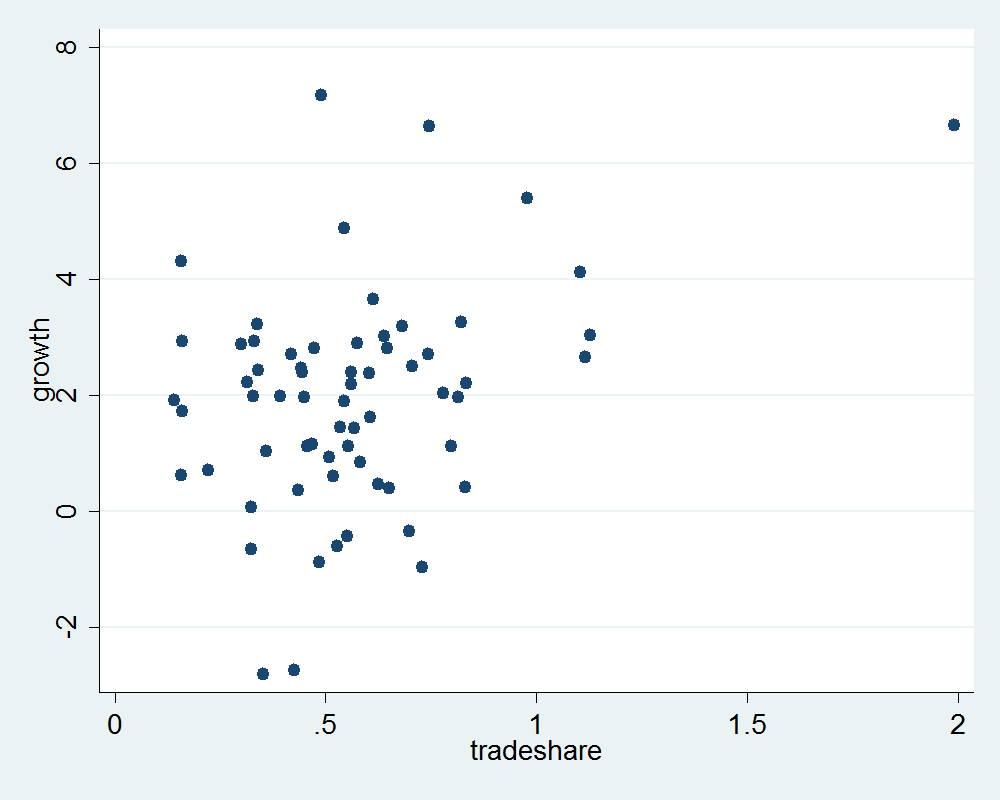

In [16]:
%%stata --graph
two (scatter growth tradeshare)

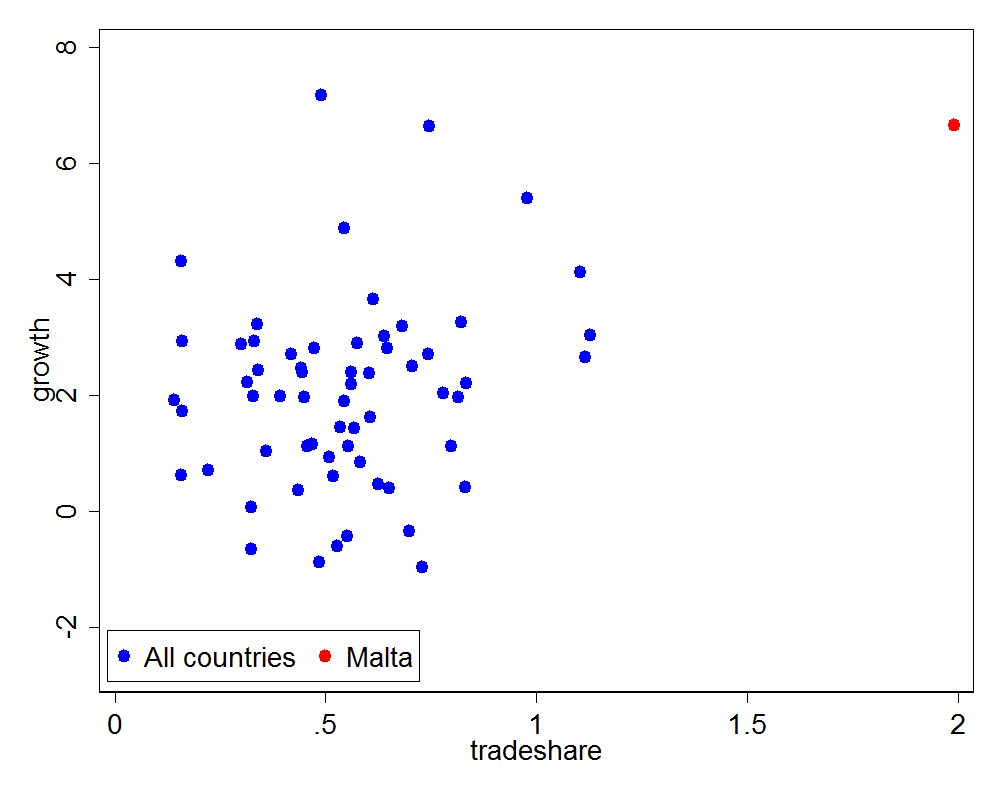

In [17]:
%%stata --graph

two (scatter growth tradeshare, mcolor(blue)) /// 
    (scatter growth tradeshare if country_name=="Malta", mcolor(red)) /// 
    , scheme(s1color) legend(pos(7) ring(0) label(1 "All countries") label(2 "Malta"))
/*
Malta does look as an outlier in the sense that its value of trade share is abnormaly distant from other values.
*/


Linear regression                               Number of obs     =         65
                                                F(1, 63)          =      12.09
                                                Prob > F          =     0.0009
                                                R-squared         =     0.1237
                                                Root MSE          =       1.79

------------------------------------------------------------------------------
             |               Robust
      growth |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
  tradeshare |   2.306434   .6632868     3.48   0.001     .9809608    3.631907
       _cons |   .6402653   .4591457     1.39   0.168    -.2772641    1.557795
------------------------------------------------------------------------------

(option xb assumed; fitted values)

Linear regression                               Number o

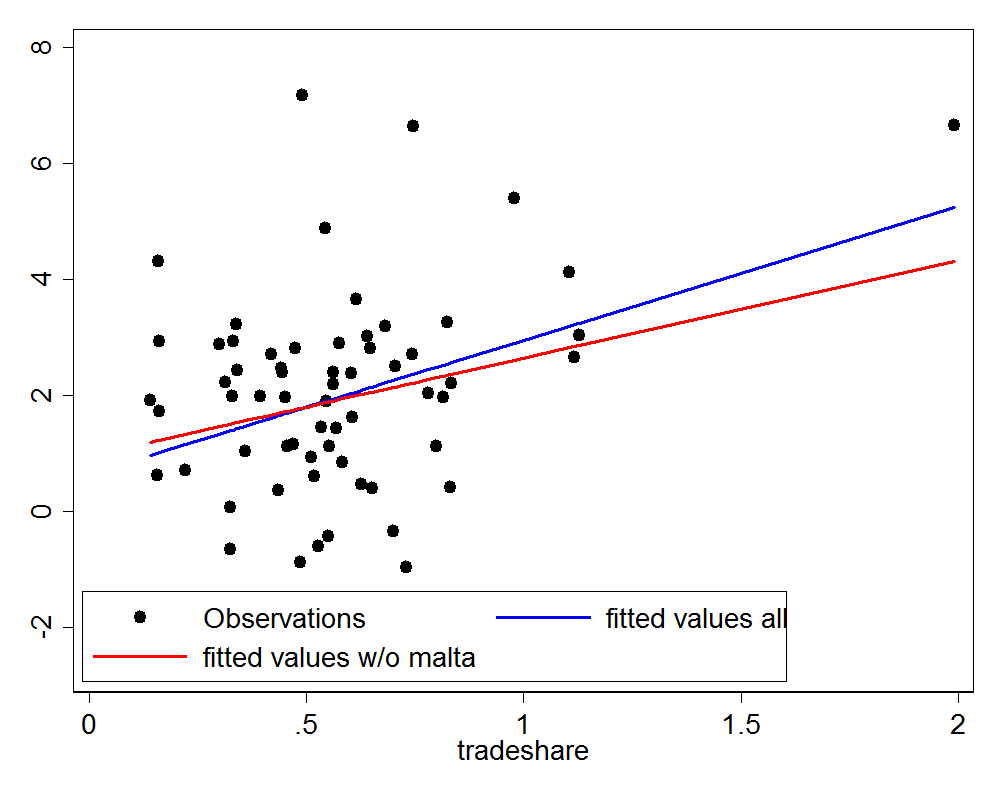

In [19]:
%%stata --graph

reg growth tradeshare, r 


predict growthhat

reg growth tradeshare if (country_name!="Malta"), r 


predict growthhat_nomalta


two (scatter growth tradeshare , mcolor(black)) /// 
    (line growthhat tradeshare , lwidth(medthick) lpattern(solid) lcolor(blue)) /// 
    (line growthhat_nomalta tradeshare , lwidth(medthick) lpattern(solid) lcolor(red)) /// 
    , scheme(s1color) legend(pos(7) ring(0)label(1 "Observations") label(2 "fitted values all") label(3 "fitted values w/o malta"))




In [20]:
%%stata
*//exclude data from Malta 
drop if country_name=="Malta"


(1 observation deleted)



In [24]:
%%stata
sum
reg growth tradeshare yearsschool rev_coups assasinations rgdp60, r


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
country_name |          0
      growth |         64     1.86912    1.816189  -2.811944   7.156855
         oil |         64           0           0          0          0
      rgdp60 |         64    3130.813    2522.979   366.9999   9895.004
  tradeshare |         64    .5423919    .2283326    .140502   1.127937
-------------+---------------------------------------------------------
 yearsschool |         64    3.959219    2.553465         .2      10.07
   rev_coups |         64    .1700666    .2254557          0   .9703704
assasinati~s |         64     .281901     .494159          0   2.466667
   growthhat |         64    1.891256    .5266341   .9643238   3.241777
growthhat_~a |         64     1.86912    .3838054   1.193581   2.853365

Linear regression                               Number of obs     =         64
                             

In [26]:
%%stata
test yearsschool rev_coups assasinations rgdp60


 ( 1)  yearsschool = 0
 ( 2)  rev_coups = 0
 ( 3)  assasinations = 0
 ( 4)  rgdp60 = 0

       F(  4,    58) =    8.18
            Prob > F =    0.0000

